In [1]:
import pandas as pd  # pandas is a library for handling tables (like Excel)

# Upload the dataset file
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset (1).csv to Titanic-Dataset (1).csv


In [2]:
# Replace with the exact filename you uploaded
df = pd.read_csv("Titanic-Dataset (1).csv")

# Show the first 5 rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
import matplotlib.pyplot as plt

# --- Save as Image for GitHub/LinkedIn ---
plt.figure(figsize=(8,2))
plt.axis('off')
plt.table(cellText=df.head().values,
          colLabels=df.columns,
          cellLoc='center',
          loc='center')
plt.savefig("dataset_preview.png", bbox_inches="tight", dpi=150)
plt.close()

from google.colab import files
files.download("dataset_preview.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# Shape of dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Column names
print("\nColumns in dataset:\n", df.columns)

# Basic information (data types, missing values, etc.)
print("\nDataset Info:")
print(df.info())

# Summary statistics (like mean, min, max)
print("\nSummary Statistics:")
print(df.describe())

# --- Save column info as text file for GitHub ---
with open("dataset_info.txt", "w") as f:
    f.write("Dataset Shape: " + str(df.shape) + "\n\n")
    f.write("Columns:\n" + str(list(df.columns)) + "\n\n")
    f.write(str(df.info()) + "\n\n")
    f.write("Summary Statistics:\n" + str(df.describe()))


Dataset Shape: (891, 12)

Columns in dataset:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:
   

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Shape of dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Column names
print("\nColumns in dataset:\n", df.columns)

# Basic information (data types, missing values, etc.)
print("\nDataset Info:")
df_info = df.info()

# Summary statistics (like mean, min, max)
print("\nSummary Statistics:")
print(df.describe())

# --- Save column info as text file ---
with open("dataset_info.txt", "w") as f:
    f.write("Dataset Shape: " + str(df.shape) + "\n\n")
    f.write("Columns:\n" + str(list(df.columns)) + "\n\n")
    f.write("Summary Statistics:\n" + str(df.describe()))

# --- Download the text file ---
files.download("dataset_info.txt")


Dataset Shape: (891, 12)

Columns in dataset:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary Statistics:
       P

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# Check missing values in the dataset
print("Missing values per column:\n", df.isnull().sum())

# --- Handle Missing Values ---

# Fill missing Age with median (because age is numeric and median is less affected by outliers)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with the most common value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values, not useful for our basic model)
df.drop(columns=['Cabin'], inplace=True)

# Drop rows still having missing values (if any remain)
df.dropna(inplace=True)

# Check again after cleaning
print("\nMissing values after cleaning:\n", df.isnull().sum())

# --- Save cleaned dataset ---
df.to_csv("Titanic_Cleaned.csv", index=False)

# Download cleaned dataset for GitHub
from google.colab import files
files.download("Titanic_Cleaned.csv")


Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-258323393.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-258323393.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

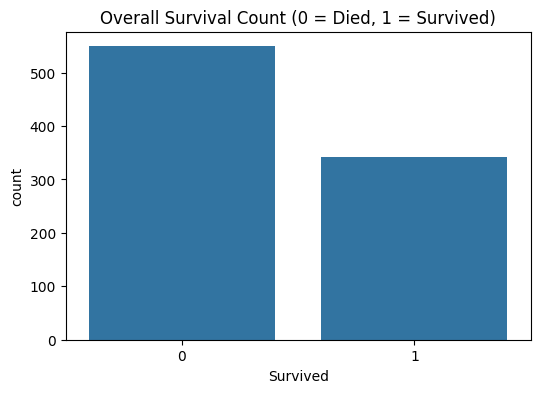

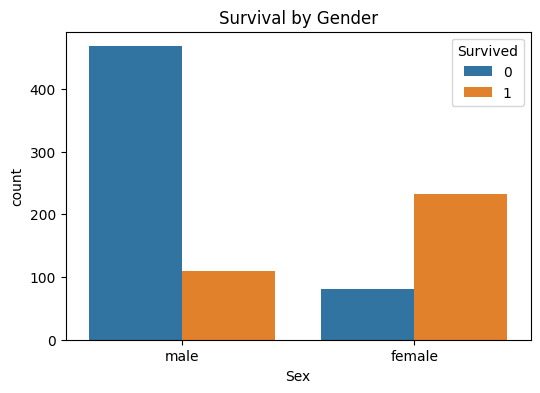

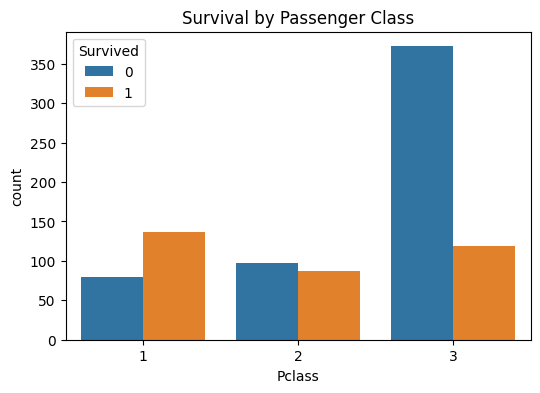

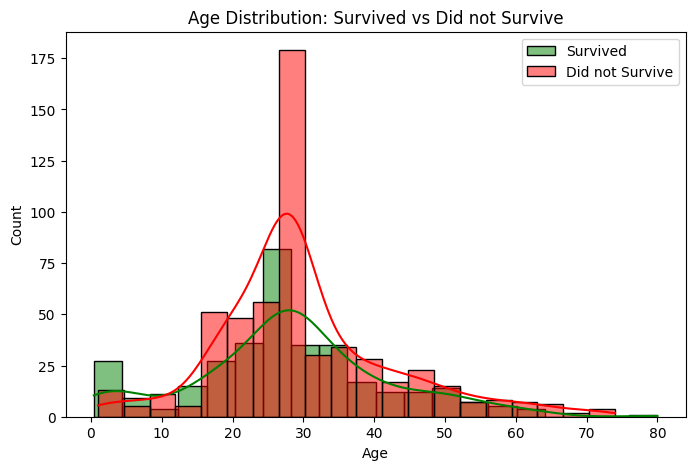

✅ Charts saved as PNG files.


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Survival count plot
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title("Overall Survival Count (0 = Died, 1 = Survived)")
plt.savefig("survival_count.png", dpi=150, bbox_inches="tight")
plt.show()
plt.close()

# 2. Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.savefig("survival_by_gender.png", dpi=150, bbox_inches="tight")
plt.show()
plt.close()

# 3. Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.savefig("survival_by_class.png", dpi=150, bbox_inches="tight")
plt.show()
plt.close()

# 4. Age distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(df[df['Survived']==1]['Age'], bins=20, kde=True, color='green', label="Survived")
sns.histplot(df[df['Survived']==0]['Age'], bins=20, kde=True, color='red', label="Did not Survive")
plt.title("Age Distribution: Survived vs Did not Survive")
plt.legend()
plt.savefig("age_distribution.png", dpi=150, bbox_inches="tight")
plt.show()
plt.close()

print("✅ Charts saved as PNG files.")


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# --- Preprocessing ---
# Convert categorical columns (Sex, Embarked) into numbers
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

# Features (X) and Target (y)
X = df.drop(columns=['Survived', 'Name', 'Ticket'])  # Drop irrelevant columns
y = df['Survived']

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Logistic Regression ---
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)

# --- Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

# --- Compare Results ---
print("Logistic Regression Accuracy:", log_acc)
print("Random Forest Accuracy:", rf_acc)

# Classification report (precision, recall, f1)
report_rf = classification_report(y_test, y_pred_rf)
print("\nRandom Forest Classification Report:\n", report_rf)

# --- Save comparison results to text file ---
with open("model_results.txt", "w") as f:
    f.write("Logistic Regression Accuracy: " + str(log_acc) + "\n")
    f.write("Random Forest Accuracy: " + str(rf_acc) + "\n\n")
    f.write("Random Forest Classification Report:\n" + report_rf)

# --- Plot accuracy comparison ---
plt.figure(figsize=(5,4))
plt.bar(["Logistic Regression", "Random Forest"], [log_acc, rf_acc], color=["blue", "green"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.savefig("model_accuracy.png", dpi=150, bbox_inches="tight")
plt.close()

print("✅ Models trained, results saved as text + PNG.")


Logistic Regression Accuracy: 0.8100558659217877
Random Forest Accuracy: 0.8268156424581006

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

✅ Models trained, results saved as text + PNG.


In [21]:
from google.colab import files
files.download("model_results.txt")
files.download("model_accuracy.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
from google.colab import files
files.download("survival_by_gender.png")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>